<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

### Import Packages

In [3]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
import copy
from skimage import feature, color, data
import pandas as pd
import cv2
import seaborn as sns
import skimage
from skimage import data, feature
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import os
import random
%matplotlib inline

### Load Transferred Dataframe

In [4]:
%store -r starting_data
%store -r validation_data

# EDA

### Display three of the learning set images

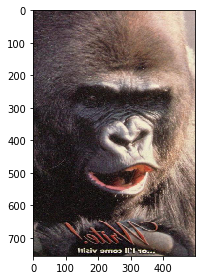

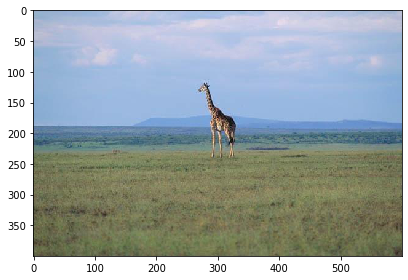

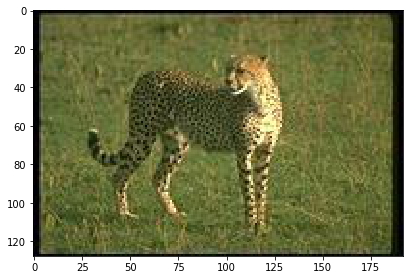

In [3]:
img1 = skimage.io.imshow(starting_data["Image"].iloc[10])
plt.show()

img2 = skimage.io.imshow(starting_data["Image"].iloc[500])
plt.show()

img3 = skimage.io.imshow(starting_data["Image"].iloc[1200])
plt.show()

### Graphical Summaries

/Applications/Anaconda/anaconda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


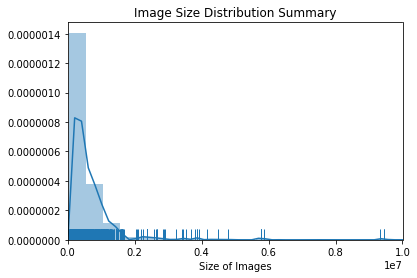

In [4]:
# Data Cleaning, convert gray image to RGB image
starting_data["Image"] = starting_data["Image"].apply(lambda x: cv2.cvtColor(x,cv2.COLOR_GRAY2RGB) if (len(x.shape) != 3) else x)

def imagesize(image):
    return image.size
sizeinfo = starting_data["Image"].apply(imagesize)

sns.distplot(sizeinfo,rug = True)
plt.xlim((0,10000000))
plt.xlabel('Size of Images')
plt.title('Image Size Distribution Summary')
plt.show()

This graph shows the distribution of size of images from the dataset

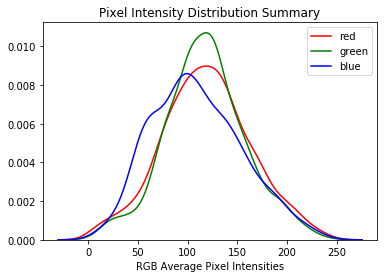

In [5]:
def pixelintensityred(image):
    return cv2.mean(image)[0]
def pixelintensitygreen(image):
    return cv2.mean(image)[1]
def pixelintensityblue(image):
    return cv2.mean(image)[2]
redinfo = starting_data["Image"].apply(pixelintensityred)
greeninfo = starting_data["Image"].apply(pixelintensitygreen)
blueinfo = starting_data["Image"].apply(pixelintensityblue)

sns.distplot(redinfo, hist = False, label = 'red', color = 'r')
sns.distplot(greeninfo, hist = False, label = 'green', color = 'g')
sns.distplot(blueinfo, hist = False, label = 'blue', color = 'b')
plt.xlabel('RGB Average Pixel Intensities')
plt.title('Pixel Intensity Distribution Summary')
plt.show()

This graph shows the distribution of image RGB pixel intensity from the dataset

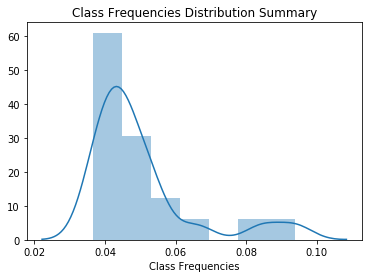

In [21]:
num = starting_data.groupby('Picture')[['Encoding']].count()
num_ratio = num / num.sum()

sns.distplot(num_ratio['Encoding'])
plt.xlabel("Class Frequencies")
plt.title("Class Frequencies Distribution Summary")
plt.show()

This graph shows the distribution of the frequency of each class from the dataset

In [12]:
classes = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']
graph=sns.barplot(x='Picture',y='Encoding',data=num_ratio.reset_index())
graph.set_xticklabels(labels=classes, rotation=90)
plt.xlabel("Class Encoding")
plt.ylabel("Class Frequencies")
plt.title("Barplot for Class Frequencies");

NameError: name 'num_ratio' is not defined

This graph shows the relative frequency of each class from the dataset

### Image Feature Definition

In [5]:
#image size
def ft0(image):
    return image.size

#average of the red-channel intensity
def ft1(image):
    return cv2.mean(image)[0]
    
#aspectratio
def ft2(image):
    return image.shape[0] / image.shape[1]

#average of the green-channel intensity
def ft3(image):
    return cv2.mean(image)[1]

#average of the blue-channel intensity
def ft4(image):
    return cv2.mean(image)[2]

#SIFT
def ft6(image):
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)# RGB -> Gary
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray,None)
    return len(kp)


#Hog Features
def ft8(image):
    image = skimage.color.rgb2gray(image)# RGB -> Gary
    image = skimage.transform.resize(image, (32, 32), mode='reflect')
    fd = skimage.feature.hog(image, orientations=9, pixels_per_cell=(16, 16), 
                        cells_per_block=(2, 2), block_norm= 'L2', visualize=False)
    return fd.flatten()

#Color Histogram
def ft9(image):
    bgr_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)# RGB -> BGR
    # convert the image to HSV color-space
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [3, 3, 3], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    return hist.flatten()

#Image Red std
def ft10(image):
    mean, std = cv2.meanStdDev(image)
    return std[0][0]

#Image Green std
def ft11(image):
    mean, std = cv2.meanStdDev(image)
    return std[1][0]

#Image Blue std
def ft12(image):
    mean, std = cv2.meanStdDev(image)
    return std[2][0]

#Image Hog mean value
def ft13(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).mean()

#Image Hog std value
def ft14(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).std()

#Image Hue mean value
def ft15(image):
    mean, std = cv2.meanStdDev(skimage.color.rgb2hsv(image))
    return mean[0][0]

#Image Saturation mean value
def ft16(image):
    mean, std = cv2.meanStdDev(skimage.color.rgb2hsv(image))
    return mean[1][0]

#Image Value mean value
def ft17(image):
    mean, std = cv2.meanStdDev(skimage.color.rgb2hsv(image))
    return mean[2][0]

#LBP Feature
def ft18(image):
    image = skimage.color.rgb2gray(image)
    image = skimage.transform.resize(image, (64, 64), mode='reflect')
    radius = 3
    n_points = 8 * radius
    lbp = skimage.feature.local_binary_pattern(image, n_points, radius, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    return hist.flatten()

 We expect all external sources sited, and significant indication of EDA. 

### Feature Examination

### Dataframe Creation

In [10]:
def feature_frame(df):
    series = pd.DataFrame(ft100(df, 10))
    df["Image"] = df["Image"].apply(lambda x: cv2.cvtColor(x,cv2.COLOR_GRAY2RGB) if (len(x.shape) != 3) else x)
    hog = pd.DataFrame(df['Image'].apply(ft8).values.tolist())
    print("Finish Hog")
    hist = pd.DataFrame(df['Image'].apply(ft9).values.tolist())
    print("Finish Histogram")
    lbp = pd.DataFrame(df['Image'].apply(ft18).values.tolist())
    print("Finish LBP")
    #sift = pd.DataFrame(df['Image'].apply(ft6).values.tolist())
    #print("Finish SIFT Transform")
    df = pd.concat([series, df, hog, hist, lbp], axis = 1)
    print("Finish Concatenation")
    df["size"] = df["Image"].apply(ft0)
    print("Finish Image Size")
    df["red_mean"] = df["Image"].apply(ft1)
    print("Finish Red Mean")
    df["aspect_ratio"] = df["Image"].apply(ft2)
    print("Finish Aspect Ratio")
    df["green_mean"] = df["Image"].apply(ft3)
    print("Finish Green Mean")
    df["blue_mean"] = df["Image"].apply(ft4)
    print("Finish Blue Mean")
    df["red_std"] = df["Image"].apply(ft10)
    print("Finish Red Std")
    df["green_std"] = df["Image"].apply(ft11)
    print("Finish Green std")
    df["blue_std"] = df["Image"].apply(ft12)
    print("Finish Blue std")
    #df["hog_mean"] = df["Image"].apply(ft13)
    #print("Finish Hog Mean")
    #df["hog_std"] = df["Image"].apply(ft14)
    #print("Finish Hog Std")
    df["hue_mean"] = df["Image"].apply(ft15)
    print("Finish Hue mean")
    df["saturation_mean"] = df["Image"].apply(ft16)
    print("Finish Saturation mean")
    df["value_mean"] = df["Image"].apply(ft17)
    print("Finish Value mean")
    del df["Image"]

    return df

In [9]:
training_set = feature_frame(starting_data)
del training_set["Picture"]
del training_set["Encoding"]
training_set = training_set.fillna(0)
validation_set = validation_set.fillna(0)
%store training_set
#validation_set = feature_frame(validation_data)

Finish Hog
Finish Histogram
Finish LBP
Finish Concatenation
Finish Image Size
Finish Red Mean
Finish Aspect Ratio
Finish Green Mean
Finish Blue Mean
Finish Red Std
Finish Green std
Finish Blue std
Finish Hue mean
Finish Saturation mean
Finish Value mean
Stored 'training_set' (DataFrame)


In [11]:
validation_set = feature_frame(validation_data)
%store validation_set

Finish Hog
Finish Histogram
Finish LBP
Finish Concatenation
Finish Image Size
Finish Red Mean
Finish Aspect Ratio
Finish Green Mean
Finish Blue Mean
Finish Red Std
Finish Green std
Finish Blue std
Finish Hue mean
Finish Saturation mean
Finish Value mean
Stored 'validation_set' (DataFrame)


In [38]:
training_set.head()

,Picture,Encoding,size,red_mean,aspect_ratio,green_mean,blue_mean,red_std,green_std,blue_std,hog_mean,hog_std,hue_std,saturation_std,value_std
0,gorilla,9,333993,149.408592,1.094044,148.160234,140.587114,76.126850,79.652049,77.692606,0.074692,0.082261,0.299449,0.106650,0.313446
1,gorilla,9,357000,61.931454,1.029412,68.196050,72.891277,40.904979,41.114958,42.808496,0.092080,0.062185,0.187981,0.125533,0.168917
2,gorilla,9,720000,75.804963,1.500000,94.221250,84.071525,60.125605,59.666652,59.045718,0.089182,0.066275,0.146514,0.229309,0.237095
3,gorilla,9,1179648,71.609828,0.666667,74.130844,64.048658,58.972949,55.929306,31.743677,0.081643,0.075366,0.221096,0.230785,0.226147
4,gorilla,9,328500,54.888630,1.216667,56.712100,47.096968,59.584329,60.357416,49.297676,0.084583,0.072051,0.256768,0.221122,0.240908


In [15]:
training_set.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,
       ...
             'red_mean',   'aspect_ratio',     'green_mean',      'blue_mean',
              'red_std',      'green_std',       'blue_std',        'hue_std',
       'saturation_std',      'value_std'],
      dtype='object', length=110)

In [16]:
training_set["Encoding"] = starting_data["Encoding"]

In [17]:
feature_names = ['size', 'red_mean', 'aspect_ratio', 'green_mean',
       'blue_mean', 'red_std', 'green_std', 'blue_std',
       'hue_mean', 'saturation_mean', 'value_mean']

In [19]:
classes = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']


### Feature Examination

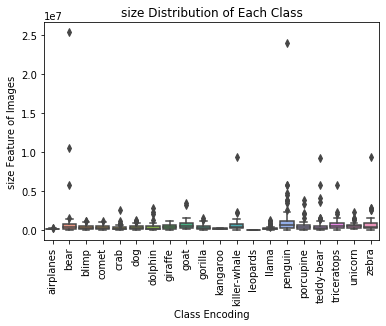

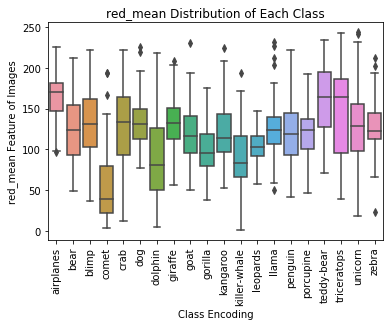

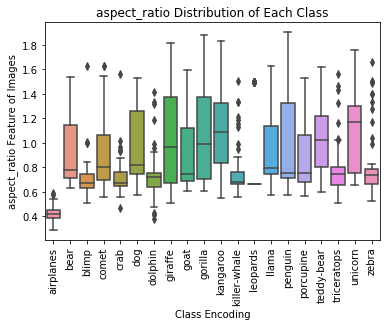

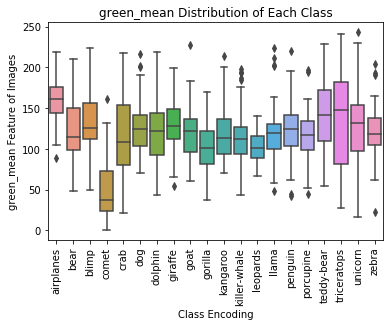

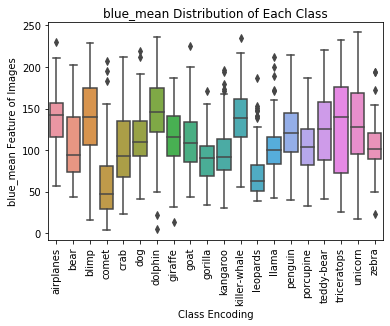

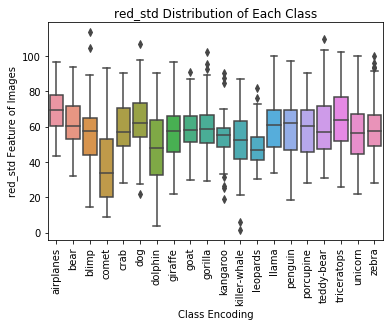

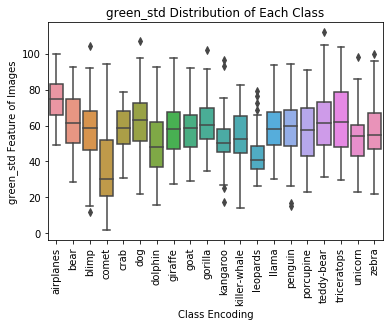

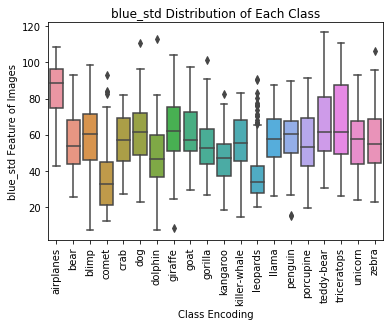

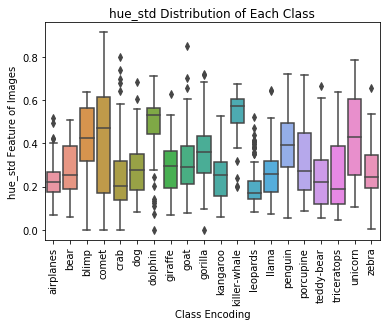

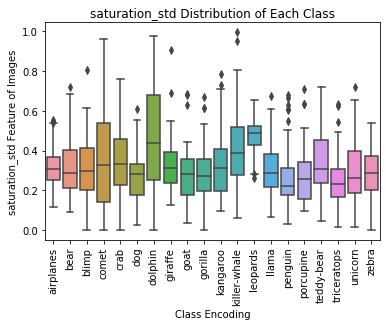

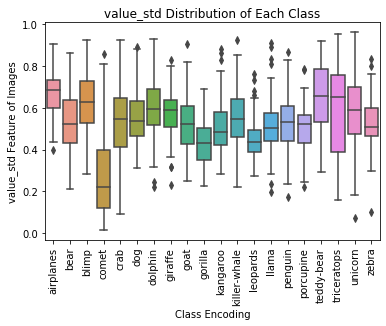

In [21]:
for i in feature_names:
    graph=sns.boxplot(y=i, x="Encoding", data=training_set)
    graph.set_xticklabels(labels=classes, rotation=90)
    plt.xlabel("Class Encoding")
    plt.ylabel(i + " Feature of Images")
    plt.title(i + " Distribution of Each Class")
    plt.savefig(i+".jpg")
    plt.show();

In [10]:
training_set = training_set.fillna(0)
validation_set = validation_set.fillna(0)

del training_set["Picture"]
del training_set["Encoding"]

From the boxplot we can see different classes have different distributions for all the features. Therefore, our feature have strong power to distinguish classes.


### Dataframe Store for transfer

In [11]:
%store training_set
%store validation_set

Stored 'training_set' (DataFrame)
Stored 'validation_set' (DataFrame)


### Sources

[1] https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html

[2] https://www.learnopencv.com/histogram-of-oriented-gradients/

[3] https://www.learnopencv.com/histogram-of-oriented-gradients/

[4] https://www.learnopencv.com/histogram-of-oriented-gradients/

[5] https://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html

[6] https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/